# <center>Basics of RNN</center>

### Import libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

In [6]:
x = np.linspace(0, 50, 501)
y = np.sin(x)

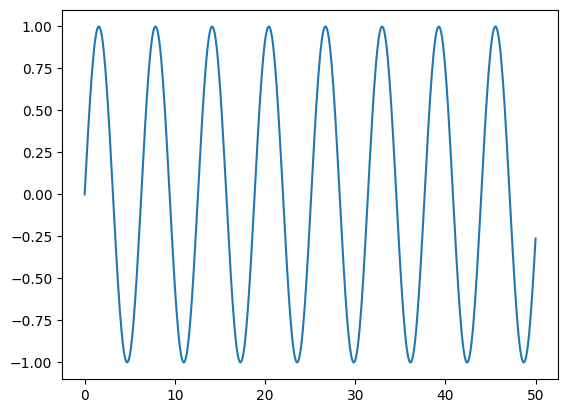

In [8]:
plt.plot(x, y)
plt.show()

In [9]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


### Train-Test Split

In [10]:
test_percent = 0.1
len(df)* test_percent

50.1

In [12]:
test_point = np.round(len(df)*test_percent)
test_point

50.0

In [13]:
test_index = int(len(df) - test_point)
test_index

451

In [15]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

### Preprocessing - Scaling Data

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [33]:
# length of output sequences
length = 50
batch_size = 1 # generate batch of data

generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length=length, batch_size=batch_size)

In [34]:
len(generator)

401

In [35]:
X, y = generator[0] 
X, y

(array([[[4.99999116e-01],
         [5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
 

**Meaning:** Given first 50 data in training set, predict the 51st data.

### Training the model - SimpleRNN

In [37]:
n_features = 1

In [38]:
model =Sequential()
model.add(SimpleRNN(units=50, input_shape=(length, n_features)))
model.add(Dense(1))

In [39]:
model.compile(optimizer='adam', loss='mse')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(generator, epochs=5)

Epoch 1/5
401/401 [==============================] - 5s 12ms/step - loss: 1.5420e-05
Epoch 2/5
401/401 [==============================] - 5s 11ms/step - loss: 9.1733e-06
Epoch 3/5
401/401 [==============================] - 5s 11ms/step - loss: 5.5594e-05
Epoch 4/5
401/401 [==============================] - 5s 11ms/step - loss: 1.1188e-05
Epoch 5/5
401/401 [==============================] - 5s 12ms/step - loss: 1.5855e-05


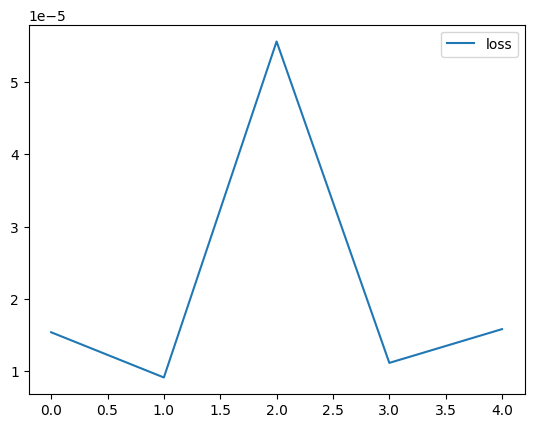

In [44]:
history = pd.DataFrame(model.history.history)
history.plot()
plt.show()

In [56]:
first_eval_batch = scaled_train[-length:]
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [58]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 28ms/step


array([[0.95163596]], dtype=float32)

In [50]:
scaled_test[0]

array([0.94955134])

In [51]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [53]:
current_batch.shape

(1, 50, 1)

In [54]:
# predicted_value = [[[99]]]
# np.append(current_batch[:, 1:, :], [[[99]]], axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [60]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch, verbose=False)[0]
    
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [61]:
test_predictions

[array([0.95163596], dtype=float32),
 array([0.9721784], dtype=float32),
 array([0.9875305], dtype=float32),
 array([0.99819195], dtype=float32),
 array([1.003586], dtype=float32),
 array([1.0040767], dtype=float32),
 array([0.9996946], dtype=float32),
 array([0.99001634], dtype=float32),
 array([0.97527385], dtype=float32),
 array([0.95628816], dtype=float32),
 array([0.93266356], dtype=float32),
 array([0.90467906], dtype=float32),
 array([0.87283105], dtype=float32),
 array([0.8376376], dtype=float32),
 array([0.7990465], dtype=float32),
 array([0.75783026], dtype=float32),
 array([0.7142284], dtype=float32),
 array([0.668102], dtype=float32),
 array([0.6203332], dtype=float32),
 array([0.5714402], dtype=float32),
 array([0.5216055], dtype=float32),
 array([0.47136497], dtype=float32),
 array([0.42107022], dtype=float32),
 array([0.37108052], dtype=float32),
 array([0.32197386], dtype=float32),
 array([0.27445212], dtype=float32),
 array([0.22892651], dtype=float32),
 array([0.18566

In [62]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 0.90326643],
       [ 0.94435099],
       [ 0.975055  ],
       [ 0.99637768],
       [ 1.00716579],
       [ 1.00814712],
       [ 0.99938292],
       [ 0.98002659],
       [ 0.95054183],
       [ 0.91257076],
       [ 0.86532194],
       [ 0.80935339],
       [ 0.74565788],
       [ 0.67527156],
       [ 0.59809   ],
       [ 0.51565815],
       [ 0.42845511],
       [ 0.33620312],
       [ 0.24066623],
       [ 0.14288106],
       [ 0.0432124 ],
       [-0.05726782],
       [-0.15785653],
       [-0.25783513],
       [-0.35604765],
       [-0.45109037],
       [-0.54214086],
       [-0.62867139],
       [-0.7092986 ],
       [-0.7830864 ],
       [-0.84944327],
       [-0.90705941],
       [-0.9556795 ],
       [-0.99497197],
       [-1.02413296],
       [-1.04261799],
       [-1.05068431],
       [-1.04868498],
       [-1.03620861],
       [-1.01364406],
       [-0.9813705 ],
       [-0.93934198],
       [-0.88847254],
       [-0.82974251],
       [-0.76279738],
       [-0

In [65]:
test['Predictions'] = true_predictions
test.head()

C:\Users\samra\AppData\Local\Temp\ipykernel_6988\94108889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


,Sine,Predictions
45.1,0.899097,0.903266
45.2,0.938307,0.944351
45.3,0.968142,0.975055
45.4,0.988304,0.996378
45.5,0.998591,1.007166


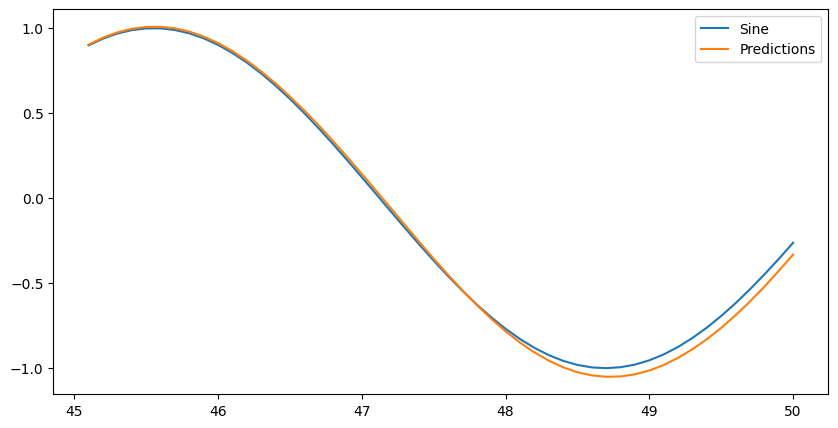

In [69]:
test.plot(figsize=(10, 5))
plt.show()

### Training the model - LSTM & early stopping

In [71]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [72]:
length = 49

generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length=length, batch_size=1)

In [74]:
model =Sequential()
model.add(LSTM(units=50, input_shape=(length, n_features)))
model.add(Dense(1))

In [75]:
model.compile(optimizer='adam', loss='mse')

In [79]:
model.fit(generator, epochs=20, callbacks=[early_stop],
          validation_data=validation_generator)

Epoch 1/20
402/402 [==============================] - 11s 21ms/step - loss: 0.0181 - val_loss: 3.1270e-05
Epoch 2/20
402/402 [==============================] - 8s 19ms/step - loss: 1.7217e-04 - val_loss: 6.5919e-07
Epoch 3/20
402/402 [==============================] - 9s 22ms/step - loss: 2.8279e-04 - val_loss: 1.0710e-05
Epoch 4/20
402/402 [==============================] - 8s 19ms/step - loss: 1.9364e-04 - val_loss: 1.7659e-05


In [81]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch, verbose=False)[0]
    
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [82]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.head()

C:\Users\samra\AppData\Local\Temp\ipykernel_6988\218417184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


,Sine,Predictions,LSTM Predictions
45.1,0.899097,0.903266,1.081306
45.2,0.938307,0.944351,1.151701
45.3,0.968142,0.975055,1.217714
45.4,0.988304,0.996378,1.279762
45.5,0.998591,1.007166,1.336275


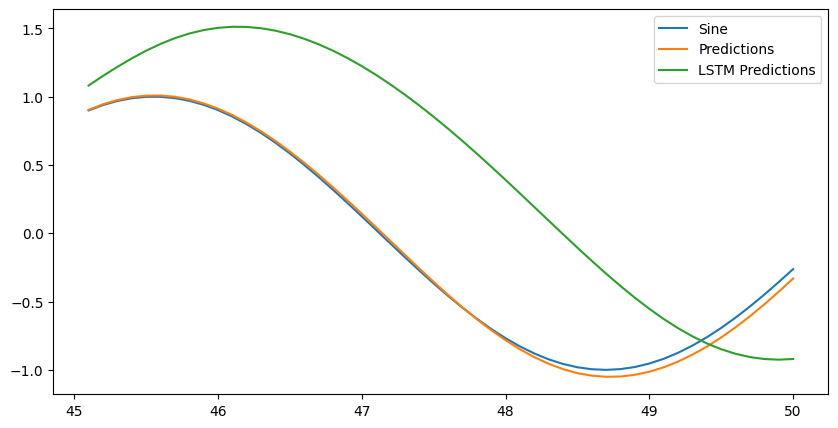

In [83]:
test.plot(figsize=(10, 5))
plt.show()

In [84]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [85]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,
                               length=length, batch_size=1)

In [86]:
model =Sequential()
model.add(LSTM(units=50, input_shape=(length, n_features)))
model.add(Dense(1))

In [88]:
model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs=6)

Epoch 1/6
452/452 [==============================] - 11s 19ms/step - loss: 7.3421e-04
Epoch 2/6
452/452 [==============================] - 9s 19ms/step - loss: 1.0967e-04
Epoch 3/6
452/452 [==============================] - 9s 20ms/step - loss: 8.4106e-05
Epoch 4/6
452/452 [==============================] - 9s 21ms/step - loss: 6.1590e-05
Epoch 5/6
452/452 [==============================] - 9s 21ms/step - loss: 2.7255e-04
Epoch 6/6
452/452 [==============================] - 9s 21ms/step - loss: 4.1476e-05


In [89]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    current_pred = model.predict(current_batch, verbose=False)[0]
    
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [90]:
forecast = scaler.inverse_transform(forecast)

In [95]:
forecast_index = np.arange(50.1, 52.6, step=0.1)

In [129]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Sine'])
forecast_df = pd.concat([df, forecast_df])

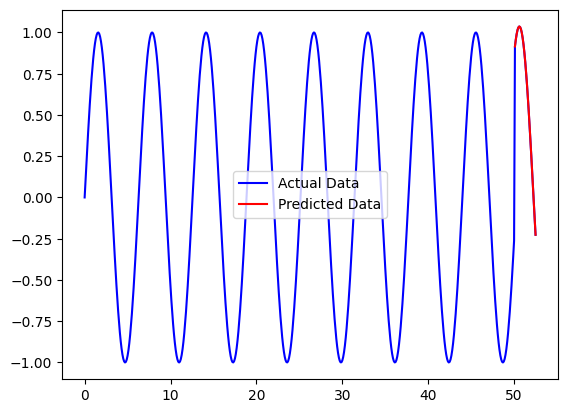

In [153]:
plt.plot(forecast_df.index, forecast_df['Sine'], label='Actual Data', color='blue')
plt.plot(forecast_df.iloc[-25:].index, forecast_df.iloc[-25:]['Sine'], label='Predicted Data', color='red')
plt.legend()
plt.show()